Using TensorFlow backend.


Inicilizando treinamento...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
155s - loss: 1.7142 - acc: 0.3965 - val_loss: 5.9092 - val_acc: 0.1006
Epoch 2/100
129s - loss: 1.1374 - acc: 0.5980 - val_loss: 1.0785 - val_acc: 0.6198
Epoch 3/100
127s - loss: 0.9115 - acc: 0.6834 - val_loss: 1.1157 - val_acc: 0.6390
Epoch 4/100
127s - loss: 0.7922 - acc: 0.7259 - val_loss: 0.7925 - val_acc: 0.7316
Epoch 5/100
127s - loss: 0.7091 - acc: 0.7585 - val_loss: 0.7281 - val_acc: 0.7485
Epoch 6/100
127s - loss: 0.6495 - acc: 0.7782 - val_loss: 0.8229 - val_acc: 0.7152
Epoch 7/100
127s - loss: 0.5994 - acc: 0.7947 - val_loss: 0.7335 - val_acc: 0.7500
Epoch 8/100
127s - loss: 0.5492 - acc: 0.8131 - val_loss: 0.7967 - val_acc: 0.7226
Epoch 9/100
127s - loss: 0.5132 - acc: 0.8232 - val_loss: 0.6749 - val_acc: 0.7813
Epoch 10/100
127s - loss: 0.4745 - acc: 0.8376 - val_loss: 0.6360 - val_acc: 0.7958
Epoch 11/100
127s - loss: 0.4506 - acc: 0.8461 - val_loss: 0.5818 - val_acc: 0.8048
Epoch 1

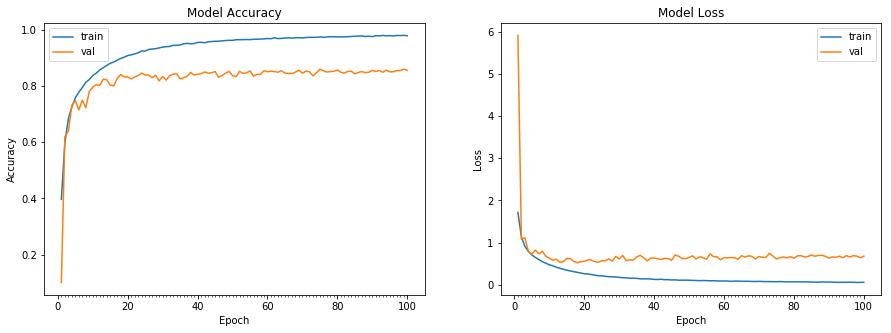


Model Accuracy =0.8559
Predict: [2]
Saída Correta: 2


In [1]:
'''
Convulutional Neural Network for CIFAR 10 classification
Autor: Igor Muniz Soares
Accuracy: 85% / 100 épocas
Time of training: 210 min Geforce GTX 930m
'''

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

import pickle
import numpy as np


img_size = 32
img_channels = 3

img_flat = img_size*img_size*img_channels


num_classes = 10
batch_size = 128
epoch = 100

train_data = np.zeros(shape=[50000, 32, 32, 3], dtype=float)
train_cls = np.zeros(shape=[50000], dtype=int)
test_data = []
test_class = []


def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def split_data_class(data):
    image = data[b'data']
    cls = np.array(data[b'labels'])

    return image, cls



def convert_data(data_orig):
    data_float = np.array(data_orig, dtype=float)/255.0
    images = data_float.reshape([-1,3,32,32])

    images = images.transpose([0,2,3,1])
    return images

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

#Os dados de treinamento devem ser baixados em http://www.cs.toronto.edu/~kriz/cifar.html
#OS dados são separados em um conjunto de treinamento (50000) e outro de teste (10000)
# Os devidos tratamentos dos dados são realizados aqui
begin = 0
for i in range(5):

    data = unpickle('cifar10/data_batch_' + str(i+1))

    image_batch, cls =split_data_class(data)
    image_batch = convert_data(image_batch)
    num_images = len(image_batch)
    end = begin + num_images
    train_data[begin:end, :] = image_batch
    train_cls[begin:end] = cls
    begin = end

test_data = unpickle('cifar10/test_batch')
image_test, cls_test = split_data_class(test_data)
image_test = convert_data(image_test)

train_cls = keras.utils.to_categorical(train_cls, num_classes)
cls_test = keras.utils.to_categorical(cls_test, num_classes)


#Construção da CNN utilizando Keras
model = Sequential()

model.add(Conv2D(48, (3, 3), padding='same',
                 input_shape=train_data.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(192, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print("Inicilizando treinamento...")

opt = keras.optimizers.Adam()


model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


model_history = model.fit(train_data, train_cls,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(image_test, cls_test),
              shuffle=True,
              verbose=2)


plot_model_history(model_history=model_history)

score = model.evaluate(image_test, cls_test, batch_size=batch_size, verbose=False)

print('\nModel Accuracy =' + str(score[1]))

rnd = np.random.randint(10000)
test = np.array([image_test[rnd]])
y_desejado = np.argmax(cls_test[rnd])



predict = model.predict(test)
y_cls = predict.argmax(axis=-1)
print("Predict: " + str(y_cls))
print("Saída Correta: "+ str(y_desejado))

